# Python Modules

Mục đích import các Module
- Các Module 'numpy', 'matplotlib.pyplot' phục vụ cho phần tiền xử lý và trực quan hóa dữ liệu
- Module 'mnist' dùng để tải tập dữ liệu MNIST từ thư viện Keras
- Module 'to_categorical' dùng để chuyển đổi các nhãn của dữ liệu từ dạng số nguyên (0-9) sang dạng one-hot encoding
- Module 'Sequential' là một API đơn giản để xây dựng các mô hình học sâu
- Module 'Dense' dùng để tạo một lớp nơ-ron kết nối đầy đủ (fully-connected layer).
- Module 'Dropout' để tránh overfitting
- Module 'SGD', 'Adam', 'RMSprop', 'Adagrad' dùng để sử dụng các thuật toán tối ưu hóa trong quá trình huấn luyện mô hình
- Module 'EarlyStopping' để tránh overfitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from tensorflow.keras.callbacks import EarlyStopping

# Data
Giới thiệu MNIST dataset
- MNIST dataset là một tập dữ liệu tiêu chuẩn trong lĩnh vực học máy và thị giác máy tính.
- Nó bao gồm 60,000 ảnh huấn luyện và 10,000 ảnh kiểm tra của các chữ số từ 0 đến 9.
- Mỗi ảnh có kích thước 28x28 pixel, được biểu diễn dưới dạng ảnh thang xám (grayscale).
- Mục tiêu chính của bài toán sử dụng MNIST là xây dựng mô hình phân loại để dự đoán chính xác chữ số xuất hiện trong ảnh.

**Lý do chọn dataset**
1. Tính phổ biến và chuẩn mực
- MNIST (Modified National Institute of Standards and Technology) là một tập dữ liệu chuẩn mực cho các bài toán phân loại hình ảnh trong lĩnh vực học máy và học sâu.
- Tập dữ liệu đã được sử dụng rộng rãi trong nghiên cứu và giảng dạy, giúp dễ dàng so sánh kết quả giữa các mô hình và thuật toán.
2. Tính đơn giản và dễ sử dụng
- Dữ liệu gọn nhẹ:
  - Các hình ảnh kích thước nhỏ (28x28 pixel) và dữ liệu không yêu cầu xử lý phức tạp.
  - Chỉ gồm 10 lớp (các chữ số từ 0 đến 9), phù hợp cho các bài toán phân loại đơn giản.
- Thời gian huấn luyện nhanh:
  - Do dữ liệu nhỏ và số lượng lớp đầu ra ít, việc huấn luyện mô hình nhanh chóng ngay cả trên phần cứng không mạnh.
3. Đầy đủ để kiểm tra các thuật toán cơ bản
- MNIST cung cấp một nền tảng tốt để kiểm tra hiệu quả của các thuật toán học sâu, đặc biệt là:
  - Gradient Descent (Batch, Stochastic, Mini-Batch).
  - Momentum, Adagrad, RMSProp, Adam, và các thuật toán tối ưu khác.
- Đây là tập dữ liệu lý tưởng để kiểm tra các khái niệm như:
  - Hàm kích hoạt (ReLU, sigmoid, softmax, v.v.).
  - Kỹ thuật giảm overfitting như Dropout và Regularization.
4. Đa dạng nhưng không quá phức tạp
- Đa dạng hình dạng chữ số:
  - Các chữ số được viết tay bởi nhiều người khác nhau, tạo ra sự đa dạng trong hình dạng.
- Dễ phân loại:
  - Mặc dù có sự khác biệt trong cách viết của từng người, các chữ số vẫn có cấu trúc rõ ràng, giúp các mô hình dễ dàng học được đặc trưng.
5. Tương thích với nhiều mô hình học sâu
- MNIST tương thích với:
  - Mạng Fully Connected (Feedforward Neural Network):
    - Phù hợp với đầu vào đã được làm phẳng (784 pixel).
  - Convolutional Neural Networks (CNNs):
    - Có thể dùng để khai thác thông tin không gian của ảnh 28x28.
  - Recurrent Neural Networks (RNNs):
    - Có thể ứng dụng để xử lý dữ liệu theo chuỗi nếu muốn (dòng pixel).
7. Có sẵn trong các thư viện tiêu chuẩn
- Tích hợp sẵn trong TensorFlow và Keras:
  - Dữ liệu có thể được tải dễ dàng với vài dòng lệnh.
  - Điều này tiết kiệm thời gian xử lý dữ liệu và giảm bớt các lỗi không mong muốn trong giai đoạn tiền xử lý.

**Giải thích code**
1. **mnist.load_data()** Dòng này tải tập dữ liệu MNIST từ thư viện Keras.  
  Kết quả trả về:  
  - **x_train**: Mảng numpy chứa các ảnh dữ liệu huấn luyện (60,000 ảnh), mỗi ảnh có kích thước 28x28.  
  - **y_train**: Mảng numpy chứa nhãn của các ảnh trong tập huấn luyện (chữ số từ 0 đến 9).  
  - **x_test**: Mảng numpy chứa các ảnh dữ liệu kiểm tra (10,000 ảnh), mỗi ảnh có kích thước 28x28.  
  - **y_test**: Mảng numpy chứa nhãn của các ảnh trong tập kiểm tra.
2. **x_train.reshape(-1, 784) / 255.0** và **x_test.reshape(-1, 784) / 255.0**
  - **reshape(-1, 784)**: Chuyển đổi mỗi ảnh từ ma trận kích thước 28x28 thành vector kích thước 784 (28x28). Dấu -1 cho phép tự động tính toán số lượng ảnh.
  - **/ 255.0**: Chuẩn hóa giá trị pixel của ảnh từ khoảng [0, 255] (giá trị gốc) về khoảng [0, 1] (giá trị chuẩn hóa). Điều này giúp mô hình hội tụ nhanh hơn trong quá trình huấn luyện.
3. **to_categorical(y_train, 10)** và **to_categorical(y_test, 10)**
  - Chuyển đổi nhãn chữ số từ dạng số nguyên (0 đến 9) sang one-hot encoding.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Model
Mô hình Feedforward Neural Network (FNN) hay còn gọi là Multilayer Perceptron (MLP). Đây là một mạng nơ-ron sâu có các lớp liên kết đầy đủ (fully-connected layers) và sử dụng cơ chế Dropout để giảm hiện tượng overfitting.  
Mô hình bao gồm:
- 3 lớp Dense (fully connected): Đây là các lớp chính của mạng.
- 2 lớp Dropout: Sử dụng để ngẫu nhiên loại bỏ một phần các nơ-ron trong quá trình huấn luyện, giảm overfitting.
- Hàm kích hoạt và Regularization: Giúp mạng hội tụ nhanh hơn và giảm hiện tượng quá khớp.


**Lý do chọn mô hình**  
1. Phù hợp với bài toán MNIST:
- MNIST là bài toán phân loại các chữ số viết tay từ 0 đến 9.
- Dữ liệu có 784 đặc trưng (28x28 pixel), rất phù hợp với mạng fully connected.
- 10 lớp đầu ra được xử lý tốt với hàm kích hoạt Softmax.
2. Thiết kế đơn giản nhưng hiệu quả:
- Hai lớp ẩn với số lượng nơ-ron vừa phải (128 và 64) giúp mô hình đủ phức tạp để học tốt nhưng không quá lớn để tránh overfitting.
- Sử dụng hàm kích hoạt ReLU tăng khả năng học phi tuyến.
3. Giảm overfitting:
- Áp dụng Dropout ở cả hai lớp ẩn để tăng khả năng tổng quát hóa.
- Regularization L2 giúp giảm trọng số quá lớn, ngăn hiện tượng overfitting.
4. Tối ưu hóa đơn giản và hiệu quả:
- Sử dụng Sequential model giúp dễ dàng thêm và chỉnh sửa các lớp.
- Phù hợp với các bài toán mà đầu vào và đầu ra được xử lý theo trình tự.

**Giải thích code**
- **model = Sequential()**: Khởi tạo một mô hình dạng tuần tự (Sequential model) trong Keras.  
  - **Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2')**: Tạo lớp nơ-ron hoàn toàn kết nối (fully connected layer) với 128 nơ-ron.
    - **activation='relu'**: Sử dụng hàm kích hoạt ReLU (Rectified Linear Unit), giúp mô hình học được phi tuyến tính.
    - **input_shape=(784,)**: Đầu vào của mạng có 784 đặc trưng (tương ứng với một vector phẳng hóa từ ảnh 28x28).
    - **kernel_regularizer='l2'**: Áp dụng L2 regularization để giảm hiện tượng overfitting.
  - **Dropout(0.3)**
    - Thêm một lớp Dropout với tỷ lệ 30% nơ-ron ngẫu nhiên bị loại bỏ trong mỗi bước huấn luyện.
    - Dropout giúp giảm overfitting, tăng khả năng tổng quát của mô hình bằng cách tránh phụ thuộc quá mức vào một tập hợp nơ-ron cụ thể.
  - **Dense(64, activation='relu', kernel_regularizer='l2')**
    - Tạo lớp fully connected với 64 nơ-ron và sử dụng hàm kích hoạt ReLU.
    - Tiếp tục áp dụng L2 regularization để giảm overfitting.
  - **Dense(10, activation='softmax')**: Tạo lớp đầu ra (output layer) với 10 nơ-ron, tương ứng với 10 lớp (chữ số từ 0 đến 9 trong MNIST).
    - **activation='softmax'**: Hàm kích hoạt Softmax chuyển đổi các giá trị đầu ra thành xác suất.

In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Hàm drawGraph**  
Hàm drawGraph() được sử dụng để vẽ biểu đồ trực quan hóa quá trình huấn luyện và đánh giá mô hình học sâu. Nó hiển thị hai biểu đồ chính:

- **Biểu đồ Loss (Hàm mất mát)**: So sánh giữa Train Loss (mất mát trên tập huấn luyện) và Validation Loss (mất mát trên tập kiểm tra/validation) qua từng epoch.
- **Biểu đồ Accuracy (Độ chính xác)**: So sánh giữa Train Accuracy (độ chính xác trên tập huấn luyện) và Validation Accuracy (độ chính xác trên tập kiểm tra/validation) qua từng epoch.

In [6]:
def drawGraph():
    # Biểu đồ loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Biểu đồ accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Batch Gradient Descent
**Tổng quan**  
- Đoạn mã này huấn luyện một mô hình học sâu (neural network) trên tập dữ liệu MNIST, sử dụng Batch Gradient Descent làm thuật toán tối ưu hóa.
- Đồng thời, nó sử dụng Early Stopping để tránh overfitting. Sau khi huấn luyện, mô hình được đánh giá và biểu đồ thể hiện quá trình huấn luyện được vẽ ra.
**Giải thích code**
1. **Khởi tạo mô hình**
- optimizer = SGD(learning_rate=0.01)
  - Sử dụng thuật toán Stochastic Gradient Descent (SGD) với tốc độ học (learning rate) là 0.01
  - Tuy nhiên, ở đây SGD được thực hiện như Batch Gradient Descent vì kích thước batch sẽ bằng kích thước toàn bộ tập dữ liệu.
- model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  - optimizer=optimizer: Gán thuật toán tối ưu hóa SGD để điều chỉnh trọng số mô hình.
  - loss='categorical_crossentropy':
    - Dùng hàm mất mát cross-entropy để đánh giá mức độ sai lệch giữa dự đoán và nhãn thực tế.
    - Đây là lựa chọn phù hợp cho bài toán phân loại nhiều lớp (MNIST có 10 lớp số từ 0-9).
  - metrics=['accuracy']: Theo dõi độ chính xác trong quá trình huấn luyện và đánh giá.
2. **Early Stopping để tránh overfitting**
- early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  - monitor='val_loss': Theo dõi sự thay đổi của hàm mất mát trên tập kiểm tra/validation (val_loss).
  - patience=10: Nếu val_loss không giảm trong 10 epoch liên tiếp, quá trình huấn luyện sẽ tự động dừng.
  - restore_best_weights=True: Sau khi dừng sớm, mô hình sẽ khôi phục lại trọng số từ epoch có val_loss nhỏ nhất.
3. **Huấn luyện mô hình**  
- history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])
  - x_train, y_train: Dữ liệu huấn luyện (hình ảnh và nhãn số).
  - epochs=100: Mô hình sẽ được huấn luyện tối đa trong 100 epoch.
  - batch_size=128:
    - Sử dụng Batch Gradient Descent với kích thước batch là toàn bộ dữ liệu huấn luyện.
    - Mỗi lần cập nhật trọng số, toàn bộ dữ liệu huấn luyện (128 mẫu) được sử dụng để tính toán gradient.
  - validation_data=(x_test, y_test): Tập kiểm tra (test set) được sử dụng để đánh giá mô hình sau mỗi epoch.
  - callbacks=[early_stopping]: Gọi đến Early Stopping để dừng huấn luyện khi val_loss không cải thiện.
4. **Đánh giá mô hình**
- final_loss, final_accuracy = model.evaluate(x_test, y_test)   
  - model.evaluate(x_test, y_test): Đánh giá mô hình trên tập kiểm tra (x_test, y_test) sau khi hoàn tất huấn luyện
  - final_loss: Giá trị hàm mất mát cuối cùng trên tập kiểm tra
  - final_accuracy: Độ chính xác cuối cùng của mô hình trên tập kiểm tra
- print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy:{final_accuracy * 100:.2f}%"): In ra hàm mất mát và độ chính xác cuối cùng
5. **Vẽ biểu đồ**
- drawGraph(): vẽ hai biểu đồ:
  - Loss over Epochs: So sánh Train Loss và Validation Loss qua từng epoch.
  - Accuracy over Epochs: So sánh Train Accuracy và Validation Accuracy qua từng epoch.


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3140 - loss: 4.8928 - val_accuracy: 0.8206 - val_loss: 3.4197
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7031 - loss: 3.4581 - val_accuracy: 0.8775 - val_loss: 2.7280
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7845 - loss: 2.8326 - val_accuracy: 0.8906 - val_loss: 2.3049
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8179 - loss: 2.4163 - val_accuracy: 0.9000 - val_loss: 1.9833
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8365 - loss: 2.0957 - val_accuracy: 0.9037 - val_loss: 1.7248
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8487 - loss: 1.8338 - val_accuracy: 0.9103 - val_loss: 1.5107
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8589 - loss: 1.6133 - val_accuracy: 0.9114 - val_loss: 1.3374
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8655 - loss: 1.4450 - val_accu

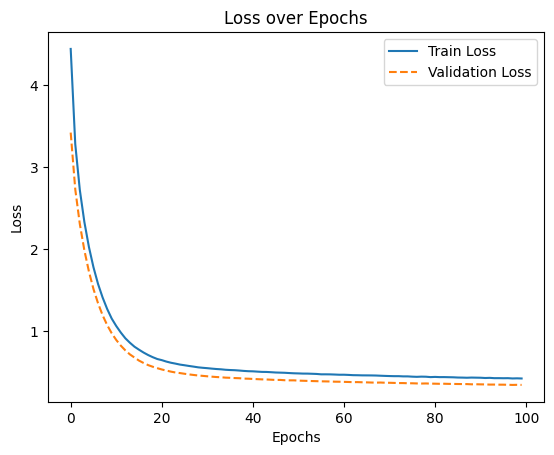

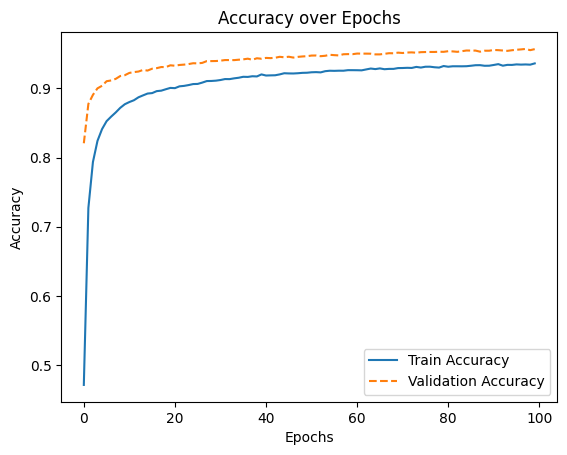

In [7]:
# Khởi tạo mô hình
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Sử dụng Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình với Batch Gradient Descent (batch size = 128)
history = model.fit(x_train, y_train, epochs=100, batch_size=128,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy: {final_accuracy * 100:.2f}%")

# Vẽ biểu đồ
drawGraph()

# Stochastic Gradient Descent
**Tổng quan**  
Stochastic Gradient Descent (SGD) là một biến thể của Gradient Descent, trong đó:  
- Cập nhật tham số dựa trên từng mẫu dữ liệu đơn lẻ, thay vì toàn bộ tập dữ liệu (Batch Gradient Descent) hoặc một nhóm nhỏ mẫu (Mini-Batch Gradient Descent).
- Ưu điểm:
  - Nhanh hơn Batch Gradient Descent vì chỉ sử dụng một mẫu để tính toán gradient.
  - Tăng khả năng thoát khỏi các cực trị cục bộ nhờ tính ngẫu nhiên.
- Nhược điểm:
  - Quá trình tối ưu hóa có thể không ổn định (dao động mạnh xung quanh cực trị toàn cục).
  - Đòi hỏi nhiều epoch để hội tụ.

**Giải thích code**
1. **Khởi tạo mô hình**
- optimizer = SGD(learning_rate=0.01)
  - Sử dụng thuật toán Stochastic Gradient Descent (SGD) với tốc độ học (learning rate) là 0.01
- model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  - optimizer=optimizer: Gán thuật toán tối ưu hóa SGD để điều chỉnh trọng số mô hình.
  - loss='categorical_crossentropy':
    - Dùng hàm mất mát cross-entropy để đánh giá mức độ sai lệch giữa dự đoán và nhãn thực tế.
    - Đây là lựa chọn phù hợp cho bài toán phân loại nhiều lớp (MNIST có 10 lớp số từ 0-9).
  - metrics=['accuracy']: Theo dõi độ chính xác trong quá trình huấn luyện và đánh giá.
2. **Early Stopping để tránh overfitting**
- early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  - monitor='val_loss': Theo dõi sự thay đổi của hàm mất mát trên tập kiểm tra/validation (val_loss).
  - patience=10: Nếu val_loss không giảm trong 10 epoch liên tiếp, quá trình huấn luyện sẽ tự động dừng.
  - restore_best_weights=True: Sau khi dừng sớm, mô hình sẽ khôi phục lại trọng số từ epoch có val_loss nhỏ nhất.
3. **Huấn luyện mô hình**  
- history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])
  - x_train, y_train: Dữ liệu huấn luyện (hình ảnh và nhãn số).
  - epochs=10: Mô hình sẽ được huấn luyện tối đa trong 10 epoch.
  - batch_size=1:
    - Đây là đặc trưng của Stochastic Gradient Descent: mỗi lần cập nhật trọng số sử dụng một mẫu dữ liệu duy nhất.
  - validation_data=(x_test, y_test): Tập kiểm tra (test set) được sử dụng để đánh giá mô hình sau mỗi epoch.
  - callbacks=[early_stopping]: Gọi đến Early Stopping để dừng huấn luyện khi val_loss không cải thiện.
4. **Đánh giá mô hình**
- final_loss, final_accuracy = model.evaluate(x_test, y_test)   
  - model.evaluate(x_test, y_test): Đánh giá mô hình trên tập kiểm tra (x_test, y_test) sau khi hoàn tất huấn luyện
  - final_loss: Giá trị hàm mất mát cuối cùng trên tập kiểm tra
  - final_accuracy: Độ chính xác cuối cùng của mô hình trên tập kiểm tra
- print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy:{final_accuracy * 100:.2f}%"): In ra hàm mất mát và độ chính xác cuối cùng
5. **Vẽ biểu đồ**
- drawGraph(): vẽ hai biểu đồ:
  - Loss over Epochs: So sánh Train Loss và Validation Loss qua từng epoch.
  - Accuracy over Epochs: So sánh Train Accuracy và Validation Accuracy qua từng epoch.


Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 129s 2ms/step - accuracy: 0.8189 - loss: 1.0674 - val_accuracy: 0.8944 - val_loss: 0.8296
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 153s 2ms/step - accuracy: 0.8342 - loss: 1.0197 - val_accuracy: 0.9004 - val_loss: 0.8189
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - accuracy: 0.8328 - loss: 1.0231 - val_accuracy: 0.9011 - val_loss: 0.8083
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 132s 2ms/step - accuracy: 0.8337 - loss: 1.0217 - val_accuracy: 0.8444 - val_loss: 0.9093
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 160s 2ms/step - accuracy: 0.8305 - loss: 1.0300 - val_accuracy: 0.8915 - val_loss: 0.8665
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 190s 2ms/step - accuracy: 0.8284 - loss: 1.0371 - val_accuracy: 0.8927 - val_loss: 0.8432
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - accuracy: 0.8308 - loss: 1.0176 - val_accuracy: 0.8171 - val_loss: 1.0396
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 148s 2ms/step - ac

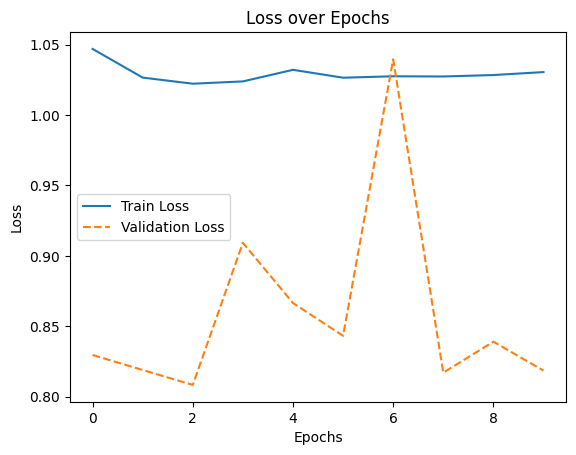

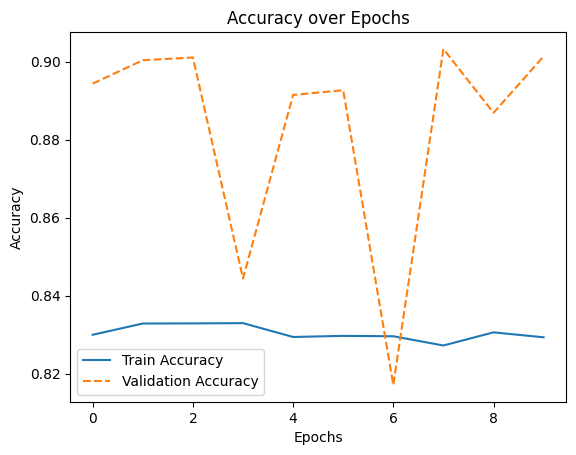

In [8]:
# Khởi tạo mô hình với SGD
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Sử dụng Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình với Stochastic Gradient Descent (batch size = 1)
history = model.fit(x_train, y_train, epochs=10, batch_size=1,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy: {final_accuracy * 100:.2f}%")

# Vẽ biểu đồ
drawGraph()

# Mini-Batch Gradient Descent
**Tổng quan**  
Mini-Batch Gradient Descent là một biến thể của Gradient Descent, trong đó:
  - Tập dữ liệu được chia thành nhiều nhóm nhỏ (mini-batches).
  - Trọng số được cập nhật dựa trên trung bình gradient của từng mini-batch thay vì toàn bộ tập dữ liệu hoặc từng mẫu đơn lẻ.

Ưu điểm:
  - Kết hợp ưu điểm của Batch Gradient Descent (ổn định) và Stochastic Gradient Descent (nhanh).
  - Khai thác song song tính toán với các phần mini-batch.   

Nhược điểm:
  - Vẫn yêu cầu điều chỉnh kích thước batch size để đạt hiệu suất tối ưu.
  - Quá nhỏ hoặc quá lớn có thể ảnh hưởng đến tốc độ hội tụ.

**Giải thích code**
1. **Khởi tạo mô hình**
- optimizer = SGD(learning_rate=0.01)
  - Sử dụng thuật toán Mini-Batch Gradient Descent với tốc độ học (learning rate) là 0.01
- model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  - optimizer=optimizer: Gán thuật toán tối ưu hóa SGD để điều chỉnh trọng số mô hình.
  - loss='categorical_crossentropy':
    - Dùng hàm mất mát cross-entropy để đánh giá mức độ sai lệch giữa dự đoán và nhãn thực tế.
    - Đây là lựa chọn phù hợp cho bài toán phân loại nhiều lớp (MNIST có 10 lớp số từ 0-9).
  - metrics=['accuracy']: Theo dõi độ chính xác trong quá trình huấn luyện và đánh giá.
2. **Early Stopping để tránh overfitting**
- early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  - monitor='val_loss': Theo dõi sự thay đổi của hàm mất mát trên tập kiểm tra/validation (val_loss).
  - patience=10: Nếu val_loss không giảm trong 10 epoch liên tiếp, quá trình huấn luyện sẽ tự động dừng.
  - restore_best_weights=True: Sau khi dừng sớm, mô hình sẽ khôi phục lại trọng số từ epoch có val_loss nhỏ nhất.
3. **Huấn luyện mô hình**  
- history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])
  - x_train, y_train: Dữ liệu huấn luyện (hình ảnh và nhãn số).
  - epochs=50: Mô hình sẽ được huấn luyện tối đa trong 50 epoch.
  - batch_size=32:
    - Chia tập huấn luyện thành các nhóm nhỏ, mỗi nhóm có 32 mẫu.
    - Mỗi mini-batch được sử dụng để tính toán gradient và cập nhật trọng số
  - validation_data=(x_test, y_test): Tập kiểm tra (test set) được sử dụng để đánh giá mô hình sau mỗi epoch.
  - callbacks=[early_stopping]: Gọi đến Early Stopping để dừng huấn luyện khi val_loss không cải thiện.
4. **Đánh giá mô hình**
- final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=1)   
  - model.evaluate(x_test, y_test): Đánh giá mô hình trên tập kiểm tra (x_test, y_test) sau khi hoàn tất huấn luyện
  - final_loss: Giá trị hàm mất mát cuối cùng trên tập kiểm tra
  - final_accuracy: Độ chính xác cuối cùng của mô hình trên tập kiểm tra
- print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy:{final_accuracy * 100:.2f}%"): In ra hàm mất mát và độ chính xác cuối cùng
5. **Vẽ biểu đồ**
- drawGraph(): vẽ hai biểu đồ:
  - Loss over Epochs: So sánh Train Loss và Validation Loss qua từng epoch.
  - Accuracy over Epochs: So sánh Train Accuracy và Validation Accuracy qua từng epoch.


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9529 - loss: 0.2758 - val_accuracy: 0.9700 - val_loss: 0.2125
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9537 - loss: 0.2748 - val_accuracy: 0.9671 - val_loss: 0.2229
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9520 - loss: 0.2777 - val_accuracy: 0.9695 - val_loss: 0.2153
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9547 - loss: 0.2700 - val_accuracy: 0.9716 - val_loss: 0.2104
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9519 - loss: 0.2780 - val_accuracy: 0.9714 - val_loss: 0.2093
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9517 - loss: 0.2784 - val_accuracy: 0.9695 - val_loss: 0.2150
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9539 - loss: 0.2714 - val_accuracy: 0.9693 - val_loss: 0.2142
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9522 - loss: 0.2738

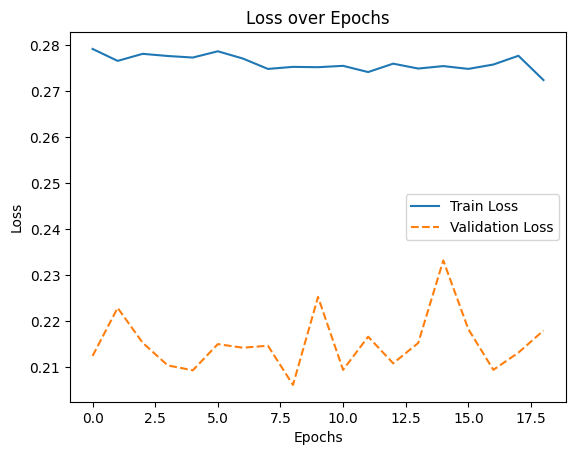

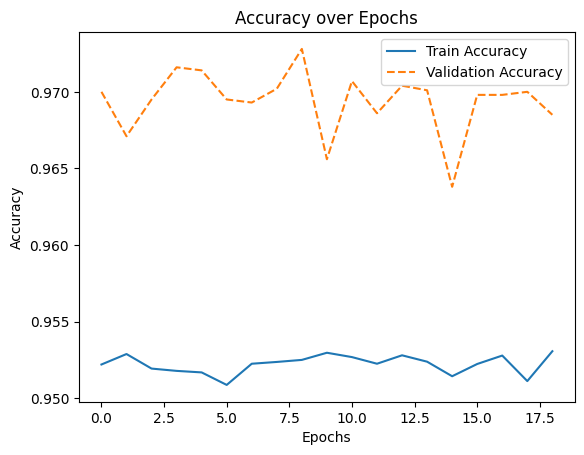

In [22]:
# Khởi tạo mô hình với SGD
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Sử dụng Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình với Mini-Batch Gradient Descent (batch_size = 32)
history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

# Đánh giá mô hình
final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy: {final_accuracy * 100:.2f}%")

# Vẽ biểu đồ
drawGraph()

# Momentum
**Tổng quan**  
Momentum là một thuật toán tối ưu hóa cải tiến của Gradient Descent, giúp tăng tốc độ hội tụ và tránh các dao động không cần thiết khi tìm cực tiểu của hàm mất mát. Ý tưởng chính của Momentum là bổ sung một thành phần quán tính, ghi nhớ hướng đi trước đó, để mô hình cập nhật trọng số hiệu quả hơn.

Ưu điểm:

- Hội tụ nhanh hơn: Nhờ giảm dao động trong không gian trọng số.
- Thoát khỏi cực trị cục bộ tốt hơn: Dễ dàng vượt qua các vùng phẳng hoặc các cực trị cục bộ.

**Giải thích code**
1. **Khởi tạo mô hình**
- optimizer = SGD(learning_rate=0.001, momentum=0.99)
  - learning_rate=0.001: Tốc độ học, điều chỉnh bước nhảy.
  - momentum=0.99: Tham số Momentum, giúp lưu trữ quán tính của gradient trước đó.
- model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  - optimizer=optimizer: Gán thuật toán tối ưu hóa Momentum để điều chỉnh trọng số mô hình.
  - loss='categorical_crossentropy':
    - Dùng hàm mất mát cross-entropy để đánh giá mức độ sai lệch giữa dự đoán và nhãn thực tế.
    - Đây là lựa chọn phù hợp cho bài toán phân loại nhiều lớp (MNIST có 10 lớp số từ 0-9).
  - metrics=['accuracy']: Theo dõi độ chính xác trong quá trình huấn luyện và đánh giá.
2. **Early Stopping để tránh overfitting**
- early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  - monitor='val_loss': Theo dõi sự thay đổi của hàm mất mát trên tập kiểm tra/validation (val_loss).
  - patience=10: Nếu val_loss không giảm trong 10 epoch liên tiếp, quá trình huấn luyện sẽ tự động dừng.
  - restore_best_weights=True: Sau khi dừng sớm, mô hình sẽ khôi phục lại trọng số từ epoch có val_loss nhỏ nhất.
3. **Huấn luyện mô hình**  
- history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])
  - x_train, y_train: Dữ liệu huấn luyện (hình ảnh và nhãn số).
  - epochs=100: Mô hình sẽ được huấn luyện tối đa trong 100 epoch.
  - batch_size=64:
    - Sử dụng mini-batch gradient descent, với mỗi batch chứa 64 mẫu.
  - validation_data=(x_test, y_test): Tập kiểm tra (test set) được sử dụng để đánh giá mô hình sau mỗi epoch.
  - callbacks=[early_stopping]: Gọi đến Early Stopping để dừng huấn luyện khi val_loss không cải thiện.
4. **Đánh giá mô hình**
- final_loss, final_accuracy = model.evaluate(x_test, y_test)   
  - model.evaluate(x_test, y_test): Đánh giá mô hình trên tập kiểm tra (x_test, y_test) sau khi hoàn tất huấn luyện
  - final_loss: Giá trị hàm mất mát cuối cùng trên tập kiểm tra
  - final_accuracy: Độ chính xác cuối cùng của mô hình trên tập kiểm tra
- print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy:{final_accuracy * 100:.2f}%"): In ra hàm mất mát và độ chính xác cuối cùng
5. **Vẽ biểu đồ**
- drawGraph(): vẽ hai biểu đồ:
  - Loss over Epochs: So sánh Train Loss và Validation Loss qua từng epoch.
  - Accuracy over Epochs: So sánh Train Accuracy và Validation Accuracy qua từng epoch.


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8986 - loss: 0.7076 - val_accuracy: 0.9431 - val_loss: 0.4101
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9167 - loss: 0.4959 - val_accuracy: 0.9441 - val_loss: 0.3973
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9179 - loss: 0.4901 - val_accuracy: 0.9449 - val_loss: 0.3901
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9195 - loss: 0.4820 - val_accuracy: 0.9478 - val_loss: 0.3827
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9196 - loss: 0.4735 - val_accuracy: 0.9468 - val_loss: 0.3810
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9201 - loss: 0.4755 - val_accuracy: 0.9508 - val_loss: 0.3796
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9221 - loss: 0.4729 - val_accuracy: 0.9500 - val_loss: 0.3787
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9192 - loss: 0.4770 - val_accu

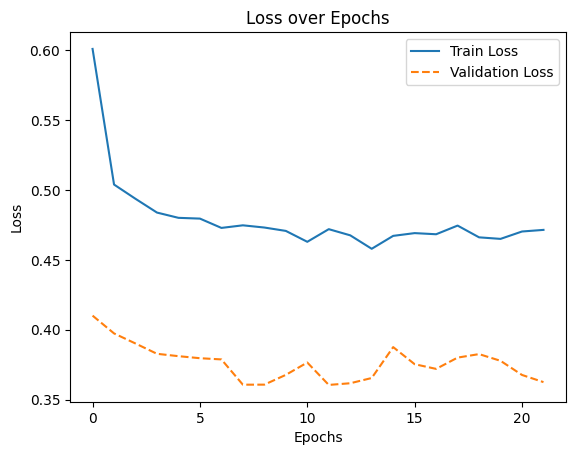

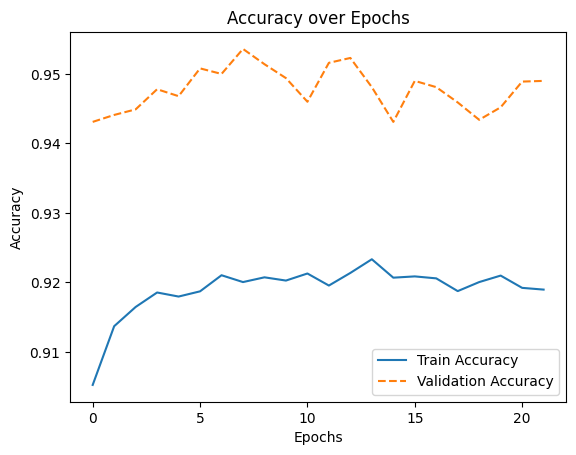

In [9]:
# Khởi tạo mô hình với Momentum
optimizer = SGD(learning_rate=0.001, momentum=0.99)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Sử dụng Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy: {final_accuracy * 100:.2f}%")

# Vẽ biểu đồ
drawGraph()

# Adgrad
**Tổng quan**  
Adagrad (Adaptive Gradient Algorithm) là một thuật toán tối ưu hóa có khả năng điều chỉnh tự động learning rate cho từng tham số dựa trên tần suất cập nhật. Adagrad phù hợp với dữ liệu thưa thớt (sparse data) và bài toán học máy yêu cầu cập nhật các tham số không đồng đều.  
Ưu điểm:

- Điều chỉnh learning rate: Adagrad giảm learning rate cho những tham số có gradient lớn và tăng learning rate cho những tham số ít cập nhật.
- Không cần chỉnh thủ công learning rate.  
Nhược điểm:

- Learning rate giảm dần: Learning rate có thể giảm quá nhiều, làm chậm tốc độ hội tụ ở các giai đoạn sau.  

**Giải thích code**
1. **Khởi tạo mô hình**
- optimizer = Adagrad(learning_rate=0.01)
  - Khởi tạo thuật toán Adagrad với learning rate ban đầu là 0.01.
  - Adagrad tự động điều chỉnh learning rate dựa trên gradient của từng tham số.
- model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  - optimizer=optimizer: Gán thuật toán tối ưu hóa Adagrad để điều chỉnh trọng số mô hình.
  - loss='categorical_crossentropy':
    - Dùng hàm mất mát cross-entropy để đánh giá mức độ sai lệch giữa dự đoán và nhãn thực tế.
    - Đây là lựa chọn phù hợp cho bài toán phân loại nhiều lớp (MNIST có 10 lớp số từ 0-9).
  - metrics=['accuracy']: Theo dõi độ chính xác trong quá trình huấn luyện và đánh giá.
2. **Early Stopping để tránh overfitting**
- early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  - monitor='val_loss': Theo dõi sự thay đổi của hàm mất mát trên tập kiểm tra/validation (val_loss).
  - patience=10: Nếu val_loss không giảm trong 10 epoch liên tiếp, quá trình huấn luyện sẽ tự động dừng.
  - restore_best_weights=True: Sau khi dừng sớm, mô hình sẽ khôi phục lại trọng số từ epoch có val_loss nhỏ nhất.
3. **Huấn luyện mô hình**  
- history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])
  - x_train, y_train: Dữ liệu huấn luyện (hình ảnh và nhãn số).
  - epochs=100: Mô hình sẽ được huấn luyện tối đa trong 100 epoch.
  - batch_size=64:
    - Sử dụng mini-batch gradient descent, với mỗi batch chứa 64 mẫu.
  - validation_data=(x_test, y_test): Tập kiểm tra (test set) được sử dụng để đánh giá mô hình sau mỗi epoch.
  - callbacks=[early_stopping]: Gọi đến Early Stopping để dừng huấn luyện khi val_loss không cải thiện.
4. **Đánh giá mô hình**
- final_loss, final_accuracy = model.evaluate(x_test, y_test)   
  - model.evaluate(x_test, y_test): Đánh giá mô hình trên tập kiểm tra (x_test, y_test) sau khi hoàn tất huấn luyện
  - final_loss: Giá trị hàm mất mát cuối cùng trên tập kiểm tra
  - final_accuracy: Độ chính xác cuối cùng của mô hình trên tập kiểm tra
- print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy:{final_accuracy * 100:.2f}%"): In ra hàm mất mát và độ chính xác cuối cùng
5. **Vẽ biểu đồ**
- drawGraph(): vẽ hai biểu đồ:
  - Loss over Epochs: So sánh Train Loss và Validation Loss qua từng epoch.
  - Accuracy over Epochs: So sánh Train Accuracy và Validation Accuracy qua từng epoch.


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9429 - loss: 0.3478 - val_accuracy: 0.9618 - val_loss: 0.2745
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9441 - loss: 0.3431 - val_accuracy: 0.9634 - val_loss: 0.2697
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9459 - loss: 0.3377 - val_accuracy: 0.9657 - val_loss: 0.2659
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9483 - loss: 0.3312 - val_accuracy: 0.9646 - val_loss: 0.2643
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9465 - loss: 0.3301 - val_accuracy: 0.9634 - val_loss: 0.2625
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9478 - loss: 0.3318 - val_accuracy: 0.9658 - val_loss: 0.2620
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9475 - loss: 0.3272 - val_accuracy: 0.9669 - val_loss: 0.2598
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9493 - loss: 0.3231 - val_accu

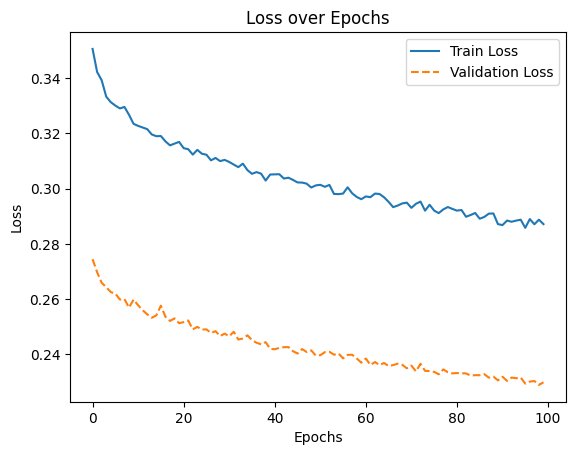

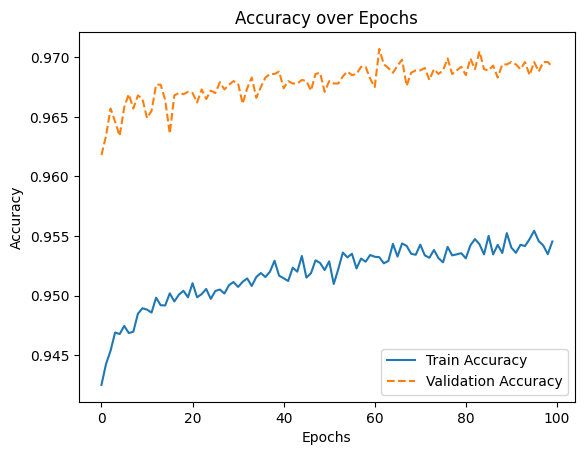

In [11]:
# Khởi tạo mô hình với Adagrad
optimizer = Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Sử dụng Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy: {final_accuracy * 100:.2f}%")

# Vẽ biểu đồ
drawGraph()

# RMSProp
**Tổng quan**  
RMSProp (Root Mean Square Propagation) là thuật toán tối ưu hóa được thiết kế để giảm thiểu vấn đề giảm learning rate quá mức như trong Adagrad. RMSProp giới hạn tốc độ giảm learning rate bằng cách sử dụng một giá trị trung bình động của bình phương gradient.

Ưu điểm:

- Cân bằng tốc độ hội tụ: RMSProp duy trì learning rate ổn định trong suốt quá trình huấn luyện.
- Hiệu quả với dữ liệu thưa thớt (sparse data) và không dừng hội tụ quá sớm.

**Giải thích code**
1. **Khởi tạo mô hình**
- optimizer = RMSprop(learning_rate=0.001)
  - Khởi tạo thuật toán RMSProp với learning rate là 0.001.
  - RMSProp tính toán trung bình động của bình phương gradient để điều chỉnh learning rate.
- model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  - optimizer=optimizer: Gán thuật toán tối ưu hóa RMSProp để tối ưu hóa.
  - loss='categorical_crossentropy':
    - Dùng hàm mất mát cross-entropy để đánh giá mức độ sai lệch giữa dự đoán và nhãn thực tế.
    - Đây là lựa chọn phù hợp cho bài toán phân loại nhiều lớp (MNIST có 10 lớp số từ 0-9).
  - metrics=['accuracy']: Theo dõi độ chính xác trong quá trình huấn luyện và đánh giá.
2. **Early Stopping để tránh overfitting**
- early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  - monitor='val_loss': Theo dõi sự thay đổi của hàm mất mát trên tập kiểm tra/validation (val_loss).
  - patience=10: Nếu val_loss không giảm trong 10 epoch liên tiếp, quá trình huấn luyện sẽ tự động dừng.
  - restore_best_weights=True: Sau khi dừng sớm, mô hình sẽ khôi phục lại trọng số từ epoch có val_loss nhỏ nhất.
3. **Huấn luyện mô hình**  
- history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])
  - x_train, y_train: Dữ liệu huấn luyện (hình ảnh và nhãn số).
  - epochs=100: Mô hình sẽ được huấn luyện tối đa trong 100 epoch.
  - batch_size=64:
    - Sử dụng mini-batch gradient descent, với mỗi batch chứa 64 mẫu.
  - validation_data=(x_test, y_test): Tập kiểm tra (test set) được sử dụng để đánh giá mô hình sau mỗi epoch.
  - callbacks=[early_stopping]: Gọi đến Early Stopping để dừng huấn luyện khi val_loss không cải thiện.
4. **Đánh giá mô hình**
- final_loss, final_accuracy = model.evaluate(x_test, y_test)   
  - model.evaluate(x_test, y_test): Đánh giá mô hình trên tập kiểm tra (x_test, y_test) sau khi hoàn tất huấn luyện
  - final_loss: Giá trị hàm mất mát cuối cùng trên tập kiểm tra
  - final_accuracy: Độ chính xác cuối cùng của mô hình trên tập kiểm tra
- print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy:{final_accuracy * 100:.2f}%"): In ra hàm mất mát và độ chính xác cuối cùng
5. **Vẽ biểu đồ**
- drawGraph(): vẽ hai biểu đồ:
  - Loss over Epochs: So sánh Train Loss và Validation Loss qua từng epoch.
  - Accuracy over Epochs: So sánh Train Accuracy và Validation Accuracy qua từng epoch.


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9184 - loss: 0.4166 - val_accuracy: 0.9539 - val_loss: 0.3107
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9257 - loss: 0.4042 - val_accuracy: 0.9550 - val_loss: 0.3110
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9250 - loss: 0.4132 - val_accuracy: 0.9502 - val_loss: 0.3086
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9223 - loss: 0.4108 - val_accuracy: 0.9351 - val_loss: 0.3563
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9232 - loss: 0.4097 - val_accuracy: 0.9518 - val_loss: 0.3126
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9262 - loss: 0.4005 - val_accuracy: 0.9476 - val_loss: 0.3211
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9263 - loss: 0.4025 - val_accuracy: 0.9504 - val_loss: 0.3133
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9260 - loss: 0.4028 - val_accu

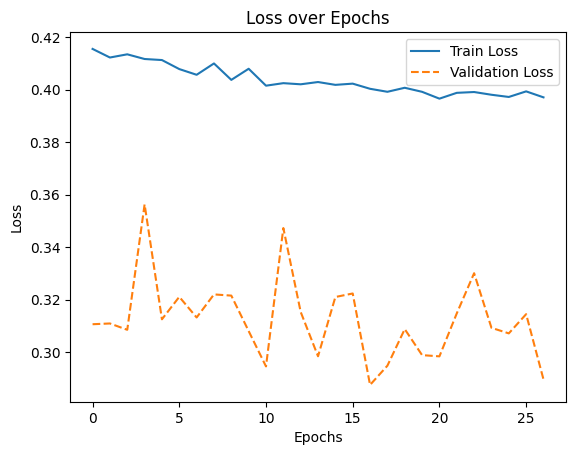

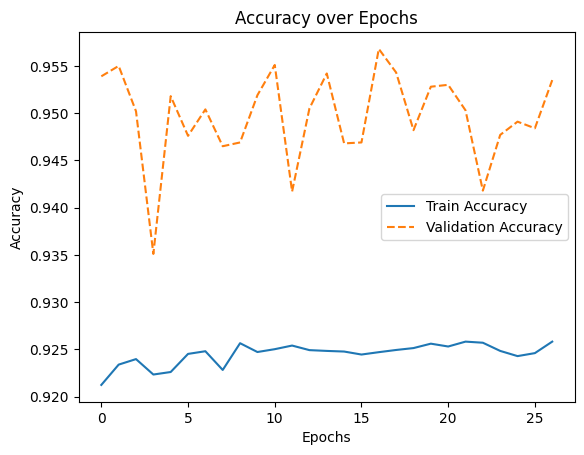

In [12]:
# Khởi tạo mô hình với RMSProp
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Sử dụng Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy: {final_accuracy * 100:.2f}%")

# Vẽ biểu đồ
drawGraph()

# Adam
**Tổng quan**  
Adam là thuật toán tối ưu hóa phổ biến trong học sâu, kết hợp hai phương pháp:

- Momentum: Tăng tốc hội tụ bằng cách tính trung bình động của gradient.
- RMSProp: Điều chỉnh learning rate dựa trên bình phương gradient trong quá khứ.
Adam phù hợp cho nhiều loại bài toán và thường được coi là "thuật toán mặc định" trong học sâu.

Ưu điểm:

- Tích hợp các lợi ích của Momentum và RMSProp.
- Ổn định và nhanh chóng hội tụ.
- Hiệu quả trên các bài toán dữ liệu thưa thớt (sparse data).

**Giải thích code**
1. **Khởi tạo mô hình**
- optimizer = Adam(learning_rate=0.0005)
  - Sử dụng thuật toán Adam với learning rate được đặt là 0.0005.
  - Adam tự động điều chỉnh learning rate dựa trên độ lớn của gradient.
- model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  - optimizer=optimizer: Gán thuật toán tối ưu hóa Adam để tối ưu hóa.
  - loss='categorical_crossentropy':
    - Dùng hàm mất mát cross-entropy để đánh giá mức độ sai lệch giữa dự đoán và nhãn thực tế.
    - Đây là lựa chọn phù hợp cho bài toán phân loại nhiều lớp (MNIST có 10 lớp số từ 0-9).
  - metrics=['accuracy']: Theo dõi độ chính xác trong quá trình huấn luyện và đánh giá.
2. **Early Stopping để tránh overfitting**
- early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  - monitor='val_loss': Theo dõi sự thay đổi của hàm mất mát trên tập kiểm tra/validation (val_loss).
  - patience=10: Nếu val_loss không giảm trong 10 epoch liên tiếp, quá trình huấn luyện sẽ tự động dừng.
  - restore_best_weights=True: Sau khi dừng sớm, mô hình sẽ khôi phục lại trọng số từ epoch có val_loss nhỏ nhất.
3. **Huấn luyện mô hình**  
- history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])
  - x_train, y_train: Dữ liệu huấn luyện (hình ảnh và nhãn số).
  - epochs=100: Mô hình sẽ được huấn luyện tối đa trong 50 epoch.
  - batch_size=128:
    - Sử dụng mini-batch gradient descent, với mỗi batch chứa 128 mẫu.
  - validation_data=(x_test, y_test): Tập kiểm tra (test set) được sử dụng để đánh giá mô hình sau mỗi epoch.
  - callbacks=[early_stopping]: Gọi đến Early Stopping để dừng huấn luyện khi val_loss không cải thiện.
4. **Đánh giá mô hình**
- final_loss, final_accuracy = model.evaluate(x_test, y_test)   
  - model.evaluate(x_test, y_test): Đánh giá mô hình trên tập kiểm tra (x_test, y_test) sau khi hoàn tất huấn luyện
  - final_loss: Giá trị hàm mất mát cuối cùng trên tập kiểm tra
  - final_accuracy: Độ chính xác cuối cùng của mô hình trên tập kiểm tra
- print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy:{final_accuracy * 100:.2f}%"): In ra hàm mất mát và độ chính xác cuối cùng
5. **Vẽ biểu đồ**
- drawGraph(): vẽ hai biểu đồ:
  - Loss over Epochs: So sánh Train Loss và Validation Loss qua từng epoch.
  - Accuracy over Epochs: So sánh Train Accuracy và Validation Accuracy qua từng epoch.


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9440 - loss: 0.3323 - val_accuracy: 0.9643 - val_loss: 0.2452
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9475 - loss: 0.3112 - val_accuracy: 0.9695 - val_loss: 0.2320
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9502 - loss: 0.2992 - val_accuracy: 0.9669 - val_loss: 0.2399
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9484 - loss: 0.2992 - val_accuracy: 0.9683 - val_loss: 0.2286
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9499 - loss: 0.2961 - val_accuracy: 0.9665 - val_loss: 0.2316
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9509 - loss: 0.2949 - val_accuracy: 0.9656 - val_loss: 0.2404
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9501 - loss: 0.2957 - val_accuracy: 0.9672 - val_loss: 0.2350
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9509 - loss: 0.2922 - val_accu

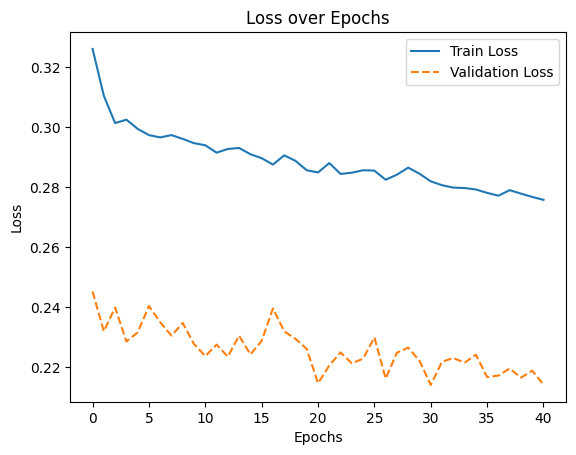

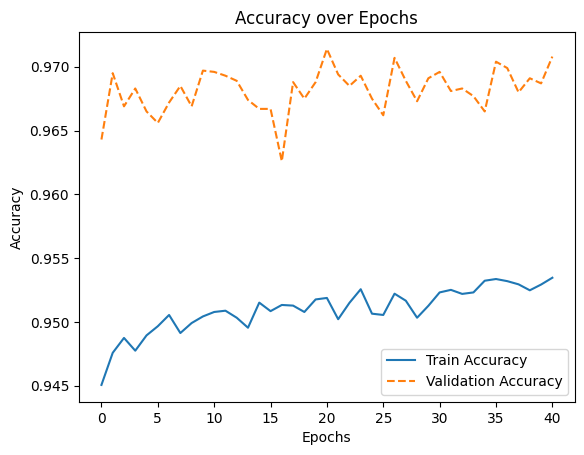

In [13]:
# Khởi tạo mô hình với Adam
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Sử dụng Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=100, batch_size=128,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Loss: {final_loss:.4f}, Final Test Accuracy: {final_accuracy * 100:.2f}%")

# Vẽ biểu đồ
drawGraph()

# So sánh các thuật toán
Để có thể so sánh các thuật toán, ta tập hợp các thuật toán lại cùng epochs

Để thuận tiện cho việc tập hợp các thuật toán lại để xử lý em tạo hàm build_model, train_model
Hàm build_model tạo và trả về một mô hình mạng neural (Neural Network) với cấu trúc gồm:
- 3 lớp Dense (Fully Connected).
- Dropout giữa các lớp để giảm thiểu overfitting.
- Regularization (L2) để giảm trọng số quá lớn.

In [14]:
# Hàm khởi tạo mô hình
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    return model

Hàm train_model là một phương pháp chung để:

1. Huấn luyện: Huấn luyện mô hình với bộ tối ưu hóa, số batch, và các cấu hình khác nhau.
2. Theo dõi hiệu suất:
  - Hiển thị quá trình huấn luyện và đánh giá.
  - Lưu lịch sử huấn luyện cho các biểu đồ so sánh.
3. Dừng sớm: Tiết kiệm thời gian huấn luyện nhờ sử dụng Early Stopping.
4. Trả về:
  - history: Lịch sử huấn luyện chứa:
    - loss: Loss trên tập huấn luyện trong từng epoch.
    - val_loss: Loss trên tập kiểm tra trong từng epoch.
    - accuracy: Accuracy trên tập huấn luyện trong từng epoch.
    - val_accuracy: Accuracy trên tập kiểm tra trong từng epoch.

In [15]:
# Hàm huấn luyện mô hình
def train_model(optimizer, name, batch_size):
    model = build_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(x_train, y_train, epochs=50, batch_size=batch_size,
                        validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

    final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} - Final Test Loss: {final_loss:.4f}, Final Test Accuracy: {final_accuracy * 100:.2f}%")

    return history

optimizers: Danh sách các thuật toán tối ưu hóa sử dụng cho mô hình.  
batch_sizes: Kích thước batch tương ứng cho từng thuật toán tối ưu hóa.

In [23]:
# Các thuật toán tối ưu hóa
optimizers = {
    'Batch Gradient Descent': SGD(learning_rate=0.01),
    'Stochastic Gradient Descent': SGD(learning_rate=0.01),
    'Mini-Batch Gradient Descent': SGD(learning_rate=0.01),
    'Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'Adagrad': Adagrad(learning_rate=0.01),
    'RMSProp': RMSprop(learning_rate=0.001),
    'Adam': Adam(learning_rate=0.001)
}

# Kích thước batch
batch_sizes = {
    'Batch Gradient Descent': x_train.shape[0],
    'Stochastic Gradient Descent': 1,
    'Mini-Batch Gradient Descent': 32,
    'Momentum': 32,
    'Adagrad': 32,
    'RMSProp': 32,
    'Adam': 32
}

Huấn luyện mô hình với nhiều thuật toán tối ưu hóa khác nhau, đồng thời lưu kết quả huấn luyện (loss, accuracy, và lịch sử huấn luyện) vào biến histories.
- histories = {}
  - Mục đích: Tạo một từ điển rỗng để lưu trữ lịch sử huấn luyện (history) của từng thuật toán tối ưu hóa.
  - Kết quả: Sau khi huấn luyện, mỗi thuật toán tối ưu hóa sẽ có một mục riêng trong từ điển histories.
- Duyệt qua từng cặp (key, value) trong từ điển optimizers
- Lấy giá trị batch_size tương ứng từ từ điển batch_sizes dựa trên tên thuật toán tối ưu hóa (name).
- Gọi hàm train_model để huấn luyện mô hình với thuật toán tối ưu hóa (optimizer) và kích thước batch (batch_size).
- Lưu kết quả huấn luyện (history) vào từ điển histories với key là name (tên thuật toán tối ưu hóa).

Kết quả cuối cùng:

- Biến histories sẽ chứa lịch sử huấn luyện của tất cả các thuật toán tối ưu hóa.

In [17]:
histories = {}

# Huấn luyện các mô hình
for name, optimizer in optimizers.items():
    print(f"Training with {name}...")
    batch_size = batch_sizes[name]
    histories[name] = train_model(optimizer, name, batch_size)

Training with Batch Gradient Descent...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1036 - loss: 5.4298 - val_accuracy: 0.1216 - val_loss: 5.3612
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1058 - loss: 5.4208 - val_accuracy: 0.1230 - val_loss: 5.3520
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1108 - loss: 5.4106 - val_accuracy: 0.1263 - val_loss: 5.3431
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1111 - loss: 5.4033 - val_accuracy: 0.1283 - val_loss: 5.3344
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step - accuracy: 0.1121 - loss: 5.3930 - val_accuracy: 0.1314 - val_loss: 5.3259
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step - accuracy: 0.1165 - loss: 5.3840 - val_accuracy: 0.1345 - val_loss: 5.3177
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1180 - loss: 5.3772 - val_accuracy: 0.1371 - val_loss: 5.3097
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1185 - loss: 5.3681 - val_accura

Hàm plot_individual_histories có mục đích trực quan hóa quá trình huấn luyện của các thuật toán tối ưu hóa khác nhau. Nó tạo ra đồ thị thể hiện sự thay đổi của:
- Loss (hàm mất mát) qua các epoch.
- Accuracy (độ chính xác) qua các epoch.

In [18]:
# Hàm vẽ đồ thị
def plot_individual_histories(histories):
    for name, history in histories.items():
        plt.figure(figsize=(12, 4))

        # Đồ thị Loss
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
        plt.title(f'{name} - Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Đồ thị Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
        plt.title(f'{name} - Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

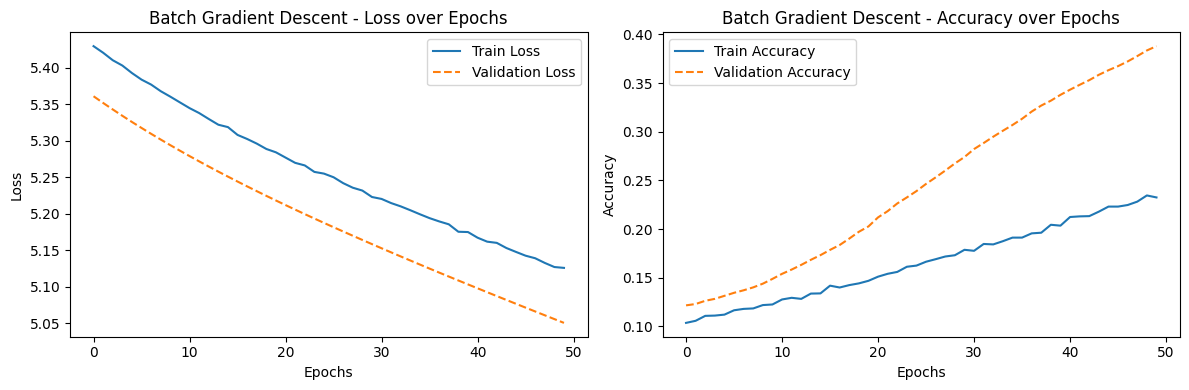

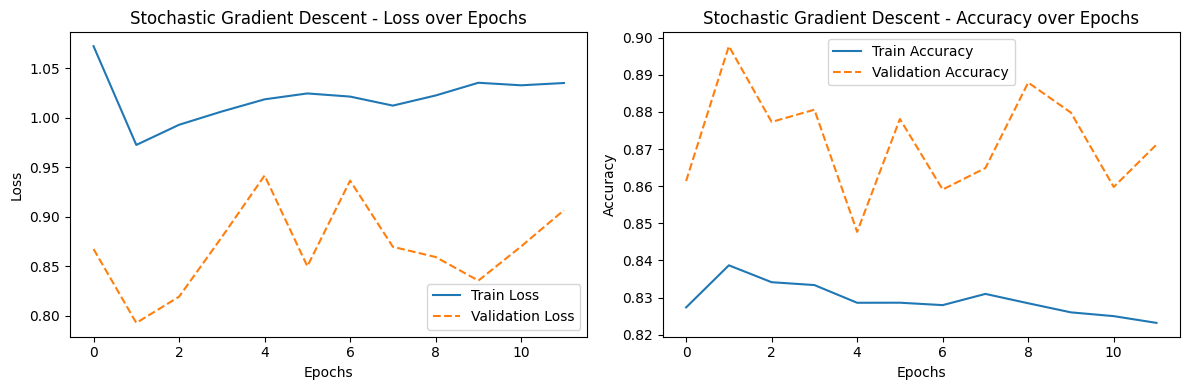

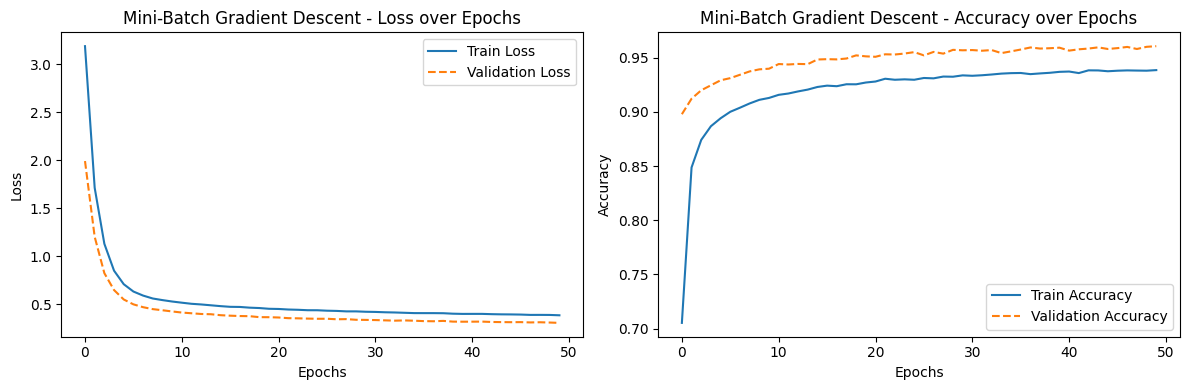

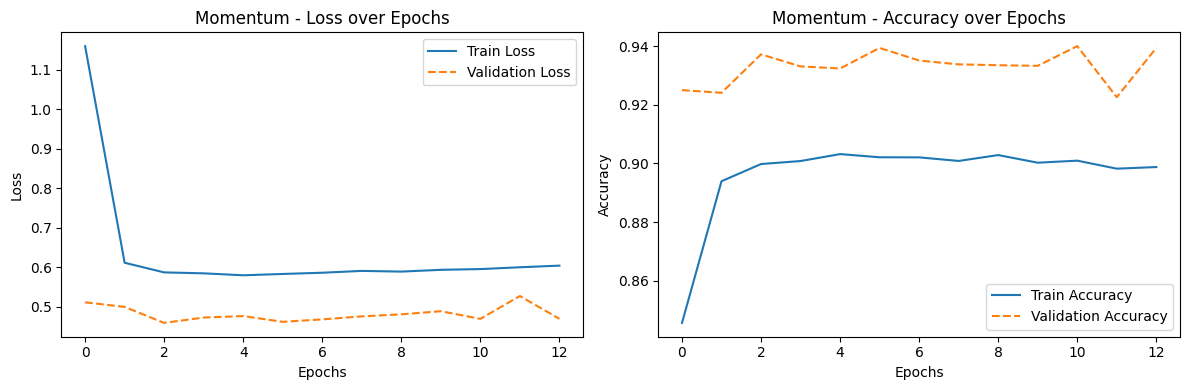

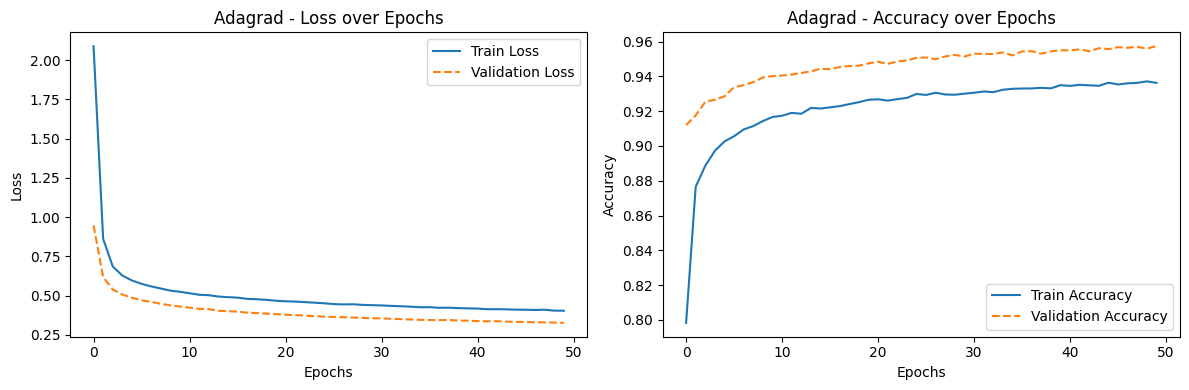

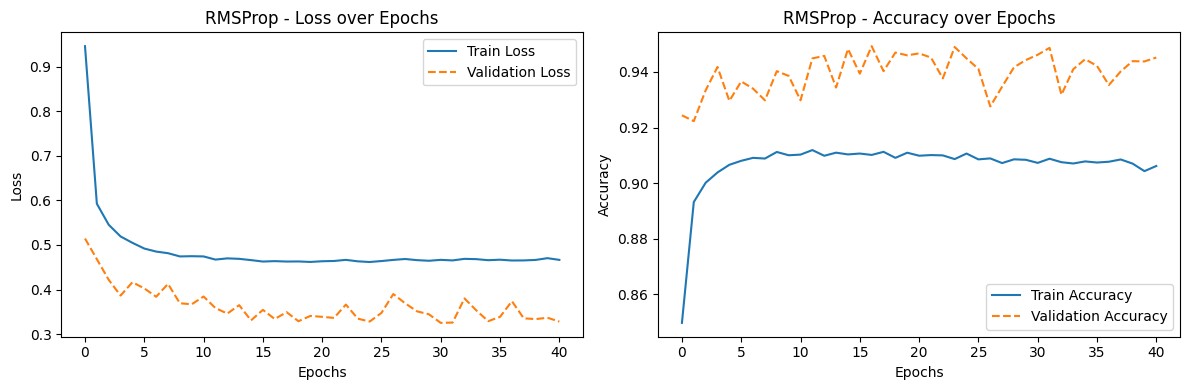

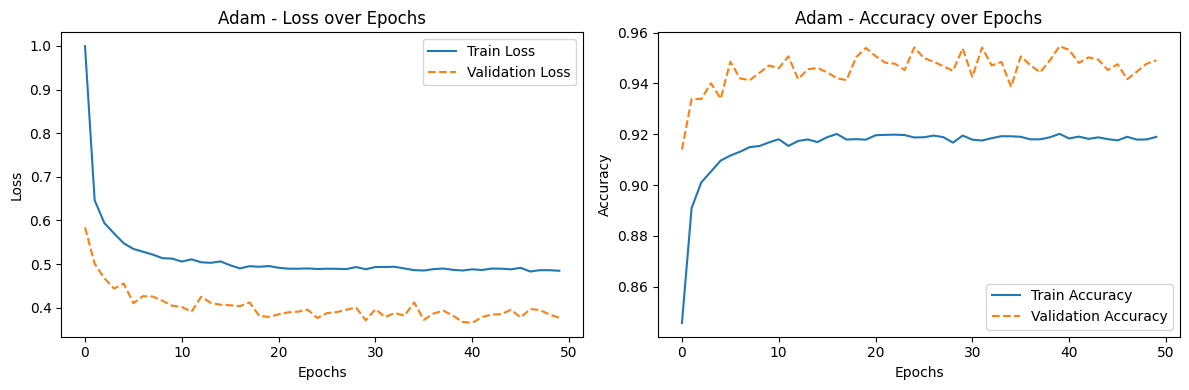

In [19]:
# Vẽ các đồ thị
plot_individual_histories(histories)

**Hàm plot_bar_chart_comparison** được sử dụng để so sánh hiệu suất của các thuật toán tối ưu hóa (optimizers) thông qua hai chỉ số chính:
- Validation Loss: Mất mát (loss) trên tập kiểm tra (validation).
- Validation Accuracy: Độ chính xác (accuracy) trên tập kiểm tra (validation).
1. Đầu vào (histories)
- histories là một từ điển chứa thông tin lịch sử huấn luyện của các thuật toán tối ưu hóa
- Mỗi mục (history_SGD, history_Adam, ...) là một đối tượng lịch sử (history) chứa các giá trị loss và accuracy qua từng epoch.
2. metric_names và metrics
- metric_names: Danh sách tên các chỉ số được so sánh (hiển thị trên biểu đồ)
- metrics: Danh sách tên chỉ số tương ứng với history (dùng để truy cập dữ liệu từ history).
3. models = list(histories.keys())
- Trích xuất danh sách tên các thuật toán tối ưu hóa (key từ từ điển histories) để làm nhãn cho các cột trong biểu đồ
4. Tạo vòng lặp với for
- Duyệt qua từng thuật toán tối ưu hóa và tạo các cột biểu diễn giá trị val_loss và val_accuracy.
  - values: Với từng thuật toán tối ưu hóa, tính giá trị val_loss và val_accurac
  - ax.bar: Vẽ các cột biểu đồ
5. Tùy chính biểu đồ
6. Kết quả
Hàm tạo một biểu đồ cột so sánh hiệu suất của các thuật toán tối ưu hóa:
- Mỗi thuật toán được biểu diễn bằng một cụm cột.
- Các cột trong mỗi cụm thể hiện:
  - Validation Loss nhỏ nhất.
  - Validation Accuracy lớn nhất.

In [20]:
# Hàm vẽ đồ thị so sánh các thuật toán
def plot_bar_chart_comparison(histories):
    metric_names = ['Validation Loss', 'Validation Accuracy']
    metrics = ['val_loss', 'val_accuracy']

    models = list(histories.keys())
    x = range(len(metric_names))
    width = 0.15

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, model in enumerate(models):
        values = [
            np.min(histories[model].history[metric]) if metric == 'val_loss' else np.max(histories[model].history[metric])
            for metric in metrics
        ]
        ax.bar([xi + i * width for xi in x], values, width=width, label=model)

    ax.set_ylabel('Metric Value')
    ax.set_title('Optimizer Comparison')
    ax.set_xticks([xi + width * (len(models) / 2 - 0.5) for xi in x])
    ax.set_xticklabels(metric_names)
    ax.legend()
    plt.tight_layout()
    plt.show()

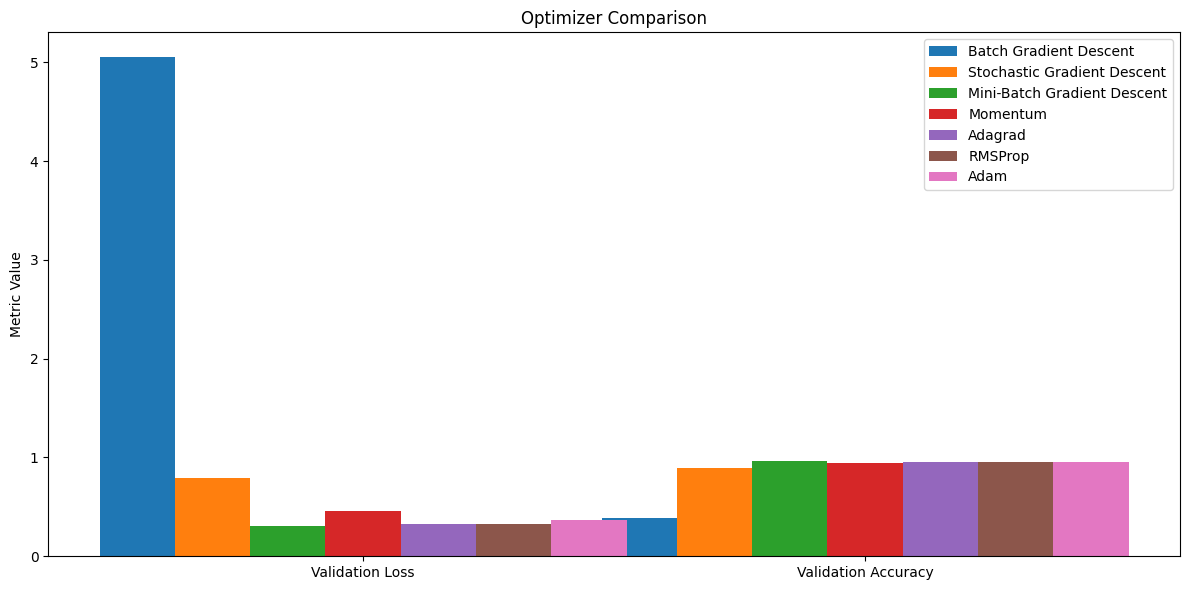

In [21]:
# Vẽ đồ thị so sánh
plot_bar_chart_comparison(histories)

# Nhận xét biểu đồ

#### **1. Validation Loss**
- **Batch Gradient Descent**:
  - Có giá trị `Validation Loss` cao vượt trội so với các thuật toán khác. Điều này cho thấy Batch Gradient Descent có hiệu suất kém hơn trên tập kiểm tra (validation).
  - Nguyên nhân có thể là do cập nhật tham số diễn ra chậm vì toàn bộ dữ liệu được sử dụng trong mỗi lần cập nhật, dẫn đến việc mô hình không hội tụ hiệu quả.

- **Stochastic Gradient Descent và Mini-Batch Gradient Descent**:
  - Cả hai thuật toán này có giá trị `Validation Loss` thấp hơn so với Batch Gradient Descent.
  - **Mini-Batch Gradient Descent** có giá trị tốt hơn một chút, nhờ sự cân bằng giữa tốc độ và sự ổn định.

- **Momentum, Adagrad, RMSProp, Adam**:
  - Các thuật toán hiện đại như **Momentum**, **Adagrad**, **RMSProp**, và **Adam** đạt giá trị `Validation Loss` rất thấp, thể hiện khả năng tối ưu hóa vượt trội.
  - **Adam** có thể nhỉnh hơn một chút nhờ sự kết hợp của Momentum và RMSProp.

---

#### **2. Validation Accuracy**
- Các thuật toán hiện đại như **Momentum**, **Adagrad**, **RMSProp**, và **Adam** đều đạt giá trị **Validation Accuracy** cao và gần tương đương.
  - **Adam** và **Momentum** có thể dẫn đầu, nhưng sự chênh lệch không đáng kể.
- **Batch Gradient Descent**:
  - Validation Accuracy thấp nhất, đồng nhất với việc có `Validation Loss` cao.
- **Stochastic Gradient Descent**:
  - Validation Accuracy thấp hơn các thuật toán hiện đại nhưng nhỉnh hơn Batch Gradient Descent.
  - Điều này phù hợp với đặc điểm của SGD, thường không ổn định và mất thời gian để đạt hội tụ.

---

### **Kết luận**
1. **Hiệu suất cao nhất**:
   - Các thuật toán hiện đại như **Adam**, **Momentum**, **RMSProp**, và **Adagrad** có hiệu suất tốt nhất, với cả **Validation Loss** thấp và **Validation Accuracy** cao.
   - Adam thường được sử dụng rộng rãi vì tính ổn định và khả năng kết hợp các ưu điểm của các thuật toán khác.

2. **Hiệu suất kém nhất**:
   - Batch Gradient Descent có hiệu suất kém nhất, không phù hợp cho bài toán MNIST vì tốc độ hội tụ chậm và yêu cầu tính toán lớn.